# Introduction to Data Science – Homework 4
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 9, 2024, 11:59pm.

In this homework, you will study Salt Lake City air quality data and complete an A/B test comparing two ads.

## Your Data
Fill out the following information:

*First Name: Logan*   
*Last Name: Correa*   
*E-mail: logan.correa@utah.edu*   
*UID: u1094034*  


In [1]:
# imports and setup
import pandas as pd
import scipy as sc
from scipy.stats import norm
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part 1: SLC Air Quality Index

In this problem, you'll study the Air Quality in Salt Lake City.

### Task 1.0.  Learn about AQI

Read about the [air quality index (AQI)](https://airnow.gov/index.cfm?action=aqibasics.aqi) and the
[AirNow](https://airnow.gov/index.cfm?action=topics.about_airnow) system.


### Task 1.1. Download data
The EPA gives access to historical air quality data at the AirData website. Read about the data available on [this information page](https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information).


Go to [this website](https://www.epa.gov/outdoor-air-quality-data/download-daily-data) and download the following daily data:
+ Pollutant = PM2.5
+ Year = 2023
+ City = Salt Lake City, UT
+ Monitor Site = All Sites



### Task 1.2. Import the data
Use the pandas.read_csv() function to import the data

A word of warning: this data isn't very clean:

+ The dates are not sorted.
+ Some dates may have missing values.
+ Some dates may have multiple values corresponding to different sensors (POC=1,2,3,4,5) and different sites.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Grad School/Intro to Data Science/Homework/HW04/ad_viz_plotval_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df_sorted = df.sort_values("Date").reset_index(drop=True)
display(df_sorted)

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,2023-01-01,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,2023-01-01,AQS,490353015,3,2.8,ug/m3 LC,12,Utah Technical Center,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.777145,-111.945849
2,2023-01-01,AQS,490353016,1,0.8,ug/m3 LC,3,Inland Port,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.807897,-112.087717
3,2023-01-01,AQS,490353015,1,3.5,ug/m3 LC,15,Utah Technical Center,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.777145,-111.945849
4,2023-01-01,AQS,490353006,2,6.8,ug/m3 LC,28,Hawthorne,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.736389,-111.872222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,2023-12-31,AQS,490353015,3,26.8,ug/m3 LC,82,Utah Technical Center,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.777145,-111.945849
6510,2023-12-31,AQS,490353016,1,24.4,ug/m3 LC,77,Inland Port,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.807897,-112.087717
6511,2023-12-31,AQS,490354002,1,32.9,ug/m3 LC,95,Near Road,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.662961,-111.901851
6512,2023-12-31,AQS,490353010,3,27.8,ug/m3 LC,84,ROSE PARK,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.784220,-111.931000


### Task 1.3. Plot the data

1. The data contains multiple PM2.5 concentration and AQI entries for the same date measured at different sites and with different sensors (POCS). Plot average PM2.5 and AQI values with respect to date in a single figure. Anyone analysing the graph should be able to answer, what is the average PM 2.5 concentration or the AQI value on a particular date.

2. Plot the average PM 2.5 concentration vs Date for two different sites (site ids - 490352005 and 490353015). Note in this case the average is just taken over POCs. Plot for both the sites should be in a single figure.
*Hint*: use the pandas groupby function


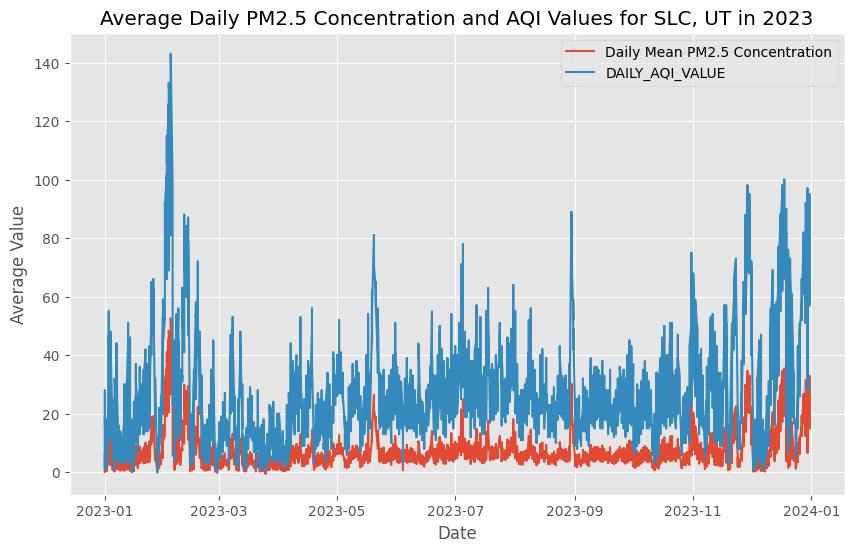

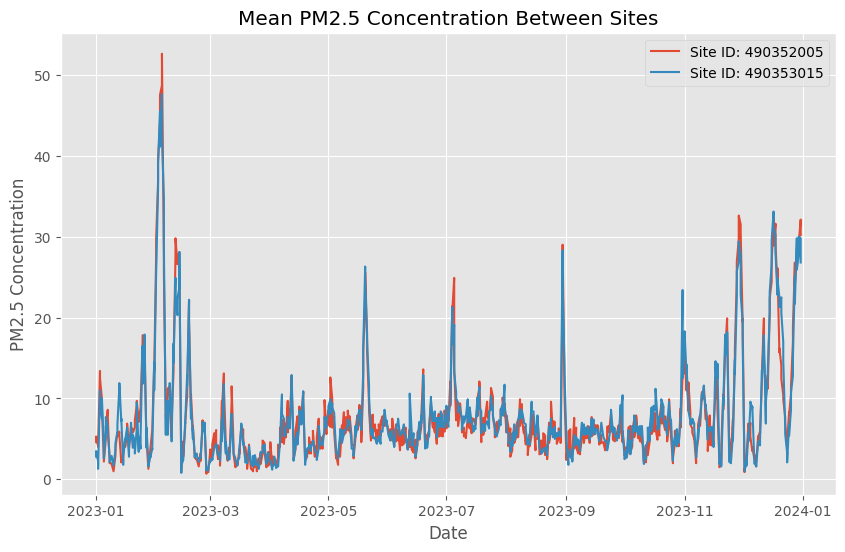

In [4]:
# Average PM2.5 and AQI values for dates
PM_AQI = df_sorted[["Date","Daily Mean PM2.5 Concentration","DAILY_AQI_VALUE"]]

PM_AQI_Average = PM_AQI.groupby("Date").mean()

#Plot
plt.plot(PM_AQI['Date'], PM_AQI['Daily Mean PM2.5 Concentration'], label='Daily Mean PM2.5 Concentration')
plt.plot(PM_AQI['Date'], PM_AQI['DAILY_AQI_VALUE'], label='DAILY_AQI_VALUE')
plt.title("Average Daily PM2.5 Concentration and AQI Values for SLC, UT in 2023")
plt.xlabel("Date")
plt.ylabel("Average Value")
plt.legend()
plt.show()

print()

# Average PM2.5 concentration for site ids - 490352005 and 490353015

PM_AQI_site = df_sorted[["Date", "Site ID", "Daily Mean PM2.5 Concentration"]]
site1 = PM_AQI_site[(PM_AQI_site['Site ID'] == 490352005)]
site2 = PM_AQI_site[(PM_AQI_site['Site ID'] == 490353015)]

# Plot
plt.plot(site1['Date'], site1['Daily Mean PM2.5 Concentration'], label='Site ID: 490352005')
plt.plot(site2['Date'], site2['Daily Mean PM2.5 Concentration'], label='Site ID: 490353015')
plt.title("Mean PM2.5 Concentration Between Sites")
plt.xlabel("Date")
plt.ylabel("PM2.5 Concentration")
plt.legend()
plt.show()

### Task 1.4. Plot a moving average

Make a plot with both the daily AQI value and a moving average for the daily AQI value. Use the daily AQI value that is averaged over the sites and POC. Experiment with different time windows to find one that is reasonable.

*Hint:* Use the rolling() function as in Lecture 8.

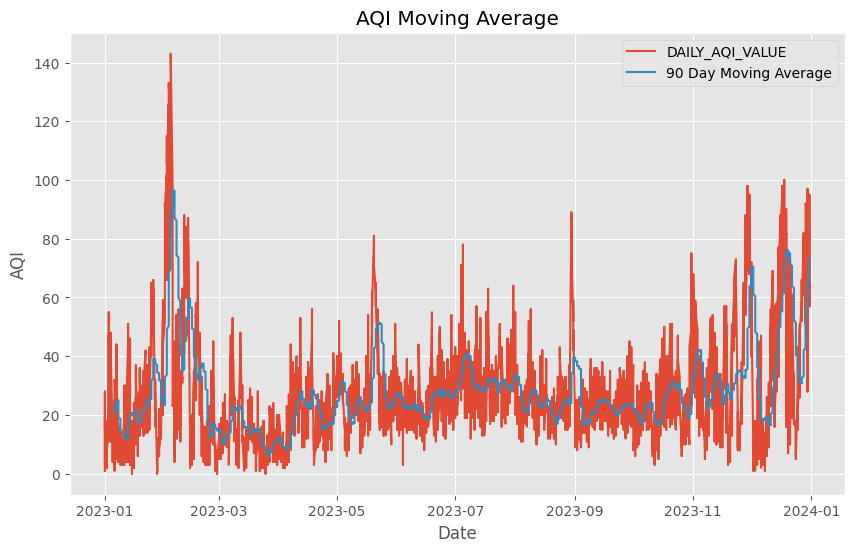

In [5]:
AQI_moving = df_sorted[["Date","DAILY_AQI_VALUE"]].copy()

AQI_moving["Moving Average 90"] = AQI_moving["DAILY_AQI_VALUE"].rolling(90).mean()

plt.plot(AQI_moving['Date'], AQI_moving['DAILY_AQI_VALUE'], label='DAILY_AQI_VALUE')
plt.plot(AQI_moving['Date'], AQI_moving['Moving Average 90'], label='90 Day Moving Average')
plt.title("AQI Moving Average")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.show()

## Part 2: A/B testing

First read the WIRED article on A/B testing [here](http://www.wired.com/2012/04/ff_abtesting/).

Suppose your company is developing a new logo. The art department develops two logos: ‘Logo A’ and ‘Logo B’, shown below.
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)

Your job is to figure out which logo is better.


You decide to conduct the following experiment. You use Google ads to buy 6000 advertisements. In $N_A=3000$ of the ads (randomly chosen), you use Logo A and in the other $N_B=3000$ ads, you use Logo B. Then you see which logo attracts more clicks.

It turns out that $n_A=800$ Logo A viewers click on the ad while $n_B=1000$ Logo B viewers click on the ad. Obviously Logo B did better in this test, but is the difference *significant* enough to say that Logo B is better? Or, perhaps, Logo B just got lucky in this test?

The goal of this exercise will be to conduct a two-proportion z-test to determine if Logo B is better. The steps will be similar to those from Lecture 7 used for the 1954 Salk polio-vaccine experiment.

### Task 2.1.  Formulate null hypothesis

Let $p_A = n_A/N_A$ be the proportion of clicks on Logo A and similiarly $p_B$ be the proportion of clicks on Logo B. In terms of $p_A$ and $p_B$, clearly state the null and alternative hypothesis.

**Your Solution:**

1. H<sub>0</sub> = pB ≤ pA
2. H<sub>a</sub> = pB > pA


### Task 2.2.  Find the two-proportion z-value  

Assuming the null hypothesis, we know from lecture that the test statistic, called the *two-proportion z-value*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
is approximately  distributed according to the standard normal distribution. Here $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ and $\hat{q} = 1-\hat{p}$.


Find the two-proportion z-value.

In [6]:
from statsmodels.stats.proportion import proportions_ztest

NA = 3000
NB = 3000
nA = 800
nB = 1000

counts = [nA, nB]
sample_sizes = [NA, NB]
z, pval = proportions_ztest(counts, sample_sizes, alternative = "smaller")
print(z)

-5.6343616981901095


### Task 2.3. Complete the two proportion z-test

Find the $p$-value for the hypothesis test. Do this first using the normal cdf function and then check your answer by running a two proportions z-test in python with the proportions_ztest function.

In [9]:
nA = 3000
nB = 3000
NA = 800
NB = 1000

# Calculate sample proportions
pA = NA / nA
pB = NB / nB

# Calculate pooled sample proportion
pooled = (NA + NB) / (nA + nB)

# Calculate standard error
SE = ((pooled * (1 - pooled)) * ((1 / nA) + (1 / nB)))**0.5

# Calculate z-score
z = (pB - pA) / SE

# Calculate p-value using normal cdf
p_value_cdf = 1 - norm.cdf(z)

print("P-value using normal cdf:", p_value_cdf)
print("P-value using proportions_ztest:", pval)

P-value using normal cdf: 8.785395078092506e-09
P-value using proportions_ztest: 8.785395076012362e-09
